#################################
##    뉴스 기사 요약 전처리   ##
#################################

0. 라이브러리 임포트

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import time
from tqdm import tqdm

c:\Users\G-10\anaconda3\envs\tensor\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. 데이터 불러오기 및 합치기

In [2]:
# raw_train_df = pd.read_csv('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/train.csv')
# raw_valid_df = pd.read_csv('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/valid.csv')

# raw_df = pd.concat([raw_train_df, raw_valid_df], ignore_index=True)

# print(f'원본 트레인 데이터 길이 : {len(raw_train_df)}')
# print(f'원본 검증 데이터 길이 : {len(raw_valid_df)}')
# print(f'예상 최종 데이터 길이 : {len(raw_train_df)+len(raw_valid_df)}')
# print(f'실제 데이터 길이 : {len(raw_df)}')
# print(raw_df.head())
raw_df = pd.read_csv('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/finalPreprocessTemp.csv')

2. title 열 날리기

In [3]:
raw_df = raw_df.iloc[:, 2:]
print(raw_df.head())

                                            sentence  \
0  ha당 조사료 400만원 작물별 차등 지원 이성훈 전라남도가 쌀 과잉문제를 근본적으...   
1  8억 투입, 고소천사벽화 자산마을에 색채 입혀 이성훈 여수시는 원도심 일대에서 추진...   
2  전남드래곤즈 해맞이 다짐 선수 영입 활발 이성훈 전남드래곤즈는 지난 4일 구봉산 해...   
3  11~24일, 매실 감 참다래 등 지역특화작목 이성훈 광양시는 오는 11일부터 24...   
4  홍콩 크루즈선사 아쿠아리우스 4, 6월 여수항 입항 이성훈 타이완의 크루즈관광객 4...   

                                                 abs  sentence_length  \
0  전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 대...              758   
1  여수시는 컬러빌리지 사업에 8억원을 투입하여 색채와 빛 도시를 완성하여 고소천사벽화...              459   
2  전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구단...              370   
3  광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실 감 참다래 등 지역특화작...              531   
4  올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입항...              550   

   abs_length  
0         155  
1         118  
2          68  
3          68  
4          66  


3. 정규 표현식

In [4]:
sentence = raw_df['sentence']
abs = raw_df['abs']

print("정규 표현식 적용 전 데이터 프레임")
print(raw_df[20:30])

def regex_column(columnList):
  if not isinstance(columnList, str):                                                   # Nan을 빈 문자열로 대체
      return ''
  columnList = re.sub(r'\S+@\S+\.\S+', '', columnList)                                  # 이메일 삭제
  columnList = columnList.replace('\n', '')                                             # 개행 삭제
  columnList = re.sub(r'\[.*?\]|\{.*?\}|\(.*?\)', '', columnList)                       # 소,중,대괄호 내용 삭제
  columnList = re.sub(r'[^가-힣a-zA-Z0-9\u4e00-\u9fff\s.,!?\'\"~]', ' ', columnList)    # 이상한 특수문자 삭제
  columnList = re.sub(r'\s+', ' ', columnList).strip()                                  # 양 끝 공백 삭제
  return columnList

sentence = sentence.apply(regex_column)
abs = abs.apply(regex_column)

df = pd.DataFrame({
    'sentence':sentence,
    'abs':abs
})

print("\n정규 표현식 적용 후 데이터 프레임")
print(df[20:30])

정규 표현식 적용 전 데이터 프레임
                                             sentence  \
20  광양상의, 기업 경기 현황 조사 기업들, 보수적 경영활동 강화 이성훈 우리 지역 기...   
21  중마도서관 나만의 그림책 만들기 10권 제작 이성훈 광양시가 지난해 3월부터 중마도...   
22  1월 말까지, 읍면동 농업인상담소에 신청 이성훈 광양시는 농업의 발전과 농업인의 다...   
23  누락자 발생예방 위한 홍보 접수 총력 이성훈 광양시는 지난 8일 신현숙 부시장 주재...   
24  어린이들의 꿈과 희망을 찾는 희망도서관 김영신 기자 아이들 눈높이에 맞춘 책장과 의...   
25  31일까지 위택스? 이성훈 광양시는 매년 6월과 12월 두 차례 정기분으로 부과되는...   
26  도로점용허가 필수, 규격? 이성훈 광양시는 올해 도로가에 무분별하게 난립하고 있는 ...   
27  아이 양육하기 좋은 도시 탄력 기대 이성훈 광양시는 지난 11일 전라남도에서는 최초...   
28  시민과 1 1 카톡방 SNS 소통행정 확대 이성훈 광양시는 지난 5일 스마트폰 사용...   
29  운영주체 못 찾아 규모 축소 또는 건립 포기 이성훈 광양시가 옥룡면 추산리에 도선국...   

                                                  abs  sentence_length  \
20  광양상공회의소 1분기 기업경기전망 지수를 조사한 결과 올해 경기 전망은 지난해와 큰...              627   
21  광양시가 지난해 3월부터 중마도서관의 성인 대상 야간 프로그램인 나만의 그림책 만들...              505   
22  광양시는 올해 과수 채소 화훼 특작, 식량작물, 기술지원 등 5개 분야 18개 사업...              576   
23  광양시는 8일 광양시 일자리 안정자금 지원단 협의회를 개최하고 일자리 안정자금 지원...   

4. 난수 날리기

In [5]:
print(f'난수 날리기 전 데이터프레임 길이 : {len(df)}')
df = df.dropna()
print(f'난수 날리기 후 데이터프레임 길이 : {len(df)}')

난수 날리기 전 데이터프레임 길이 : 1000
난수 날리기 후 데이터프레임 길이 : 1000


5. 문자열 길이 제한 하기

5-1. 문자열 길이 시각화


Sentence 열 길이:
최대 길이: 1199, 최소 길이: 11, 평균 길이: 704.01

Abs 열 길이:
최대 길이: 190, 최소 길이: 38, 평균 길이: 95.28


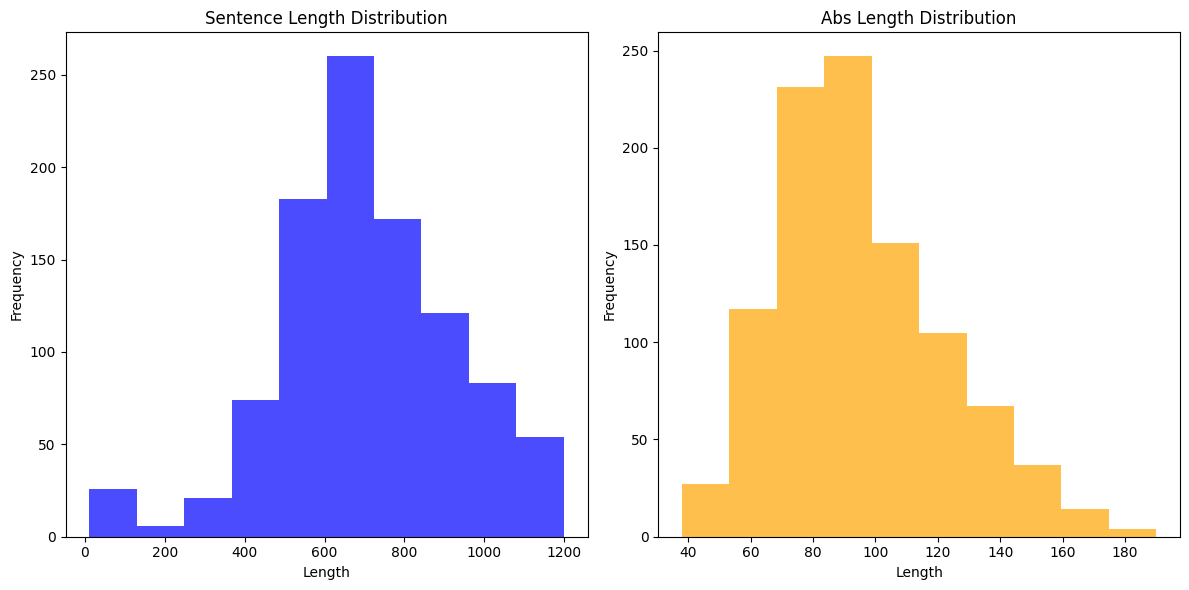

In [6]:
def data_length_distribution(df, sentence='sentence', abs='abs'):
  df['sentence_length'] = df[sentence].apply(len)
  df['abs_length'] = df[abs].apply(len)

  sentence_max_length = df['sentence_length'].max()
  sentence_min_length = df['sentence_length'].min()
  sentence_mean_length = df['sentence_length'].mean()

  abs_max_length = df['abs_length'].max()
  abs_min_length = df['abs_length'].min()
  abs_mean_length = df['abs_length'].mean()

  print("\nSentence 열 길이:")
  print(f"최대 길이: {sentence_max_length}, 최소 길이: {sentence_min_length}, 평균 길이: {sentence_mean_length:.2f}")

  print("\nAbs 열 길이:")
  print(f"최대 길이: {abs_max_length}, 최소 길이: {abs_min_length}, 평균 길이: {abs_mean_length:.2f}")

  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.hist(df['sentence_length'], bins=10, color='blue', alpha=0.7)
  plt.title('Sentence Length Distribution')
  plt.xlabel('Length')
  plt.ylabel('Frequency')

  plt.subplot(1, 2, 2)
  plt.hist(df['abs_length'], bins=10, color='orange', alpha=0.7)
  plt.title('Abs Length Distribution')
  plt.xlabel('Length')
  plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()
  df = df.drop(columns=['sentence_length','abs_length'])
  
data_length_distribution(df)


5-2. 길이 제한


Sentence 열 길이:
최대 길이: 1199, 최소 길이: 11, 평균 길이: 704.01

Abs 열 길이:
최대 길이: 190, 최소 길이: 38, 평균 길이: 95.28


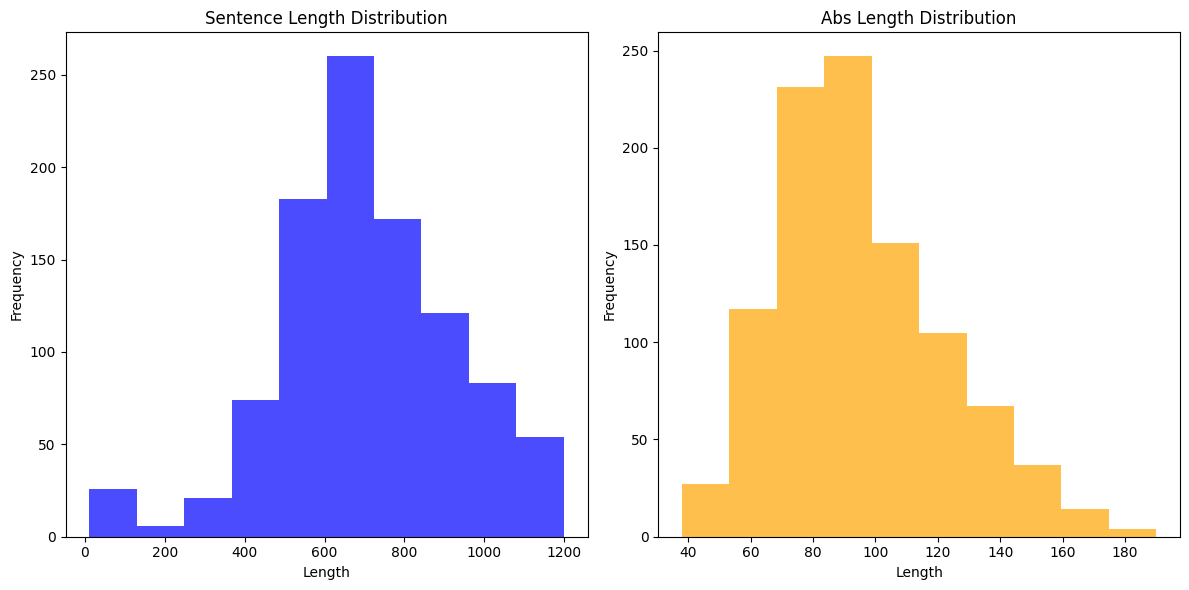

길이 제한 전 데이터 프레임 길이 : 1000
길이 제한 후 데이터 프레임 길이 : 1000
삭제 된 행 : 0


In [7]:
pre_length = len(df)

df = df[(df['sentence'].str.len() > 10) & (df['sentence'].str.len() < 1200)]
df = df[(df['abs'].str.len() > 10) & (df['abs'].str.len() < 200)]

data_length_distribution(df)

after_length = len(df)

print(f'길이 제한 전 데이터 프레임 길이 : {pre_length}')
print(f'길이 제한 후 데이터 프레임 길이 : {after_length}')
print(f'삭제 된 행 : {pre_length-after_length}')

df.to_csv('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/finalPreprocess.csv')

6. 토큰화

6-1. SubwordTokenizer 실행

In [8]:
sentences = []
for sentence in df['sentence']:
    sentences.append(sentence)
abs = []
for sentence in df['abs']:
    abs.append(sentence)

start_time = time.time()

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    sentences + abs, target_vocab_size = 2**14
)

end_time = time.time()
total_time = end_time - start_time

print(f"토크나이저 총 소요 시간: {total_time:.2f}초")
tokenizer.save_to_file('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/tokenizerTemp')

토크나이저 총 소요 시간: 51.90초


6-2. 토큰화 검증

In [9]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.load_from_file('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/tokenizerTemp')

print(f'토큰 크기: {tokenizer.vocab_size}')
print(f'\n토큰 예시: {tokenizer.subwords[:10]}')
print(f'\n인코딩 테스트 - 전: {sentences[19]}')
encodingList = tokenizer.encode(sentences[19])
print(f'\n인코딩 테스트 - 후: {encodingList}')

토큰 크기: 15540

토큰 예시: [', ', '. ', '을_', '의_', '이_', '는_', '에_', '고_', '를_', '과_']

인코딩 테스트 - 전: 총 12개소 대상, 위험요소 사전 차단 김영신 기자 광양시는 광양소방서와 함께 시민들이 많이 이용하고 있는 다중이용시설 중 화재에 취약한 건축물을 대상으로 소방 특별점검을 실시했다. 이번 소방 특별점검은 화재가 발생해 인명피해가 발생한 제천 노블휘트니스 스파와 유사한 건물 3개소와 인명피해가 우려되는 다중이용시설 9개소 등 총 12개소를 대상으로 진행됐다. 소방공무원과 관련 전문가, 공무원으로 구성된 점검반은 지난 3일부터 화재 시 피난 할 수 있는 비상구 폐쇄 및 비상구나 피난통로에 장애물 설치 여부, 소방시설 정상작동 여부와 관리 상태 등 화재위험과 인명피해 우려되는 요소들을 집중적으로 점검했다. 조사결과 소방시설 불량과 건축물 임의 증축, 비상구 다른 용도 활용 등으로 적발된 곳에는 현지 시정명령 등의 조치를 취했으며, 소방서에서도 소방시설 불량사항에 대한 조치명령 발부와 취약대상 소방시설을 대상으로 소방훈련을 실시할 계획이다. 조춘규 안전총괄과장은 다중복합시설은 내부 구조가 복잡해 화재가 발생하면 연기로 인해 비상구를 찾기 매우 어렵다 며 건물 관리자는 피난통로의 장애물을 제거하고 소방시설 정상 작동을 확인하고, 이용자는 비상구를 미리 확인하는 등 모두가 관심을 가져야 인명피해를 막을 수 있다 고 당부했다. 한편, 소방당국은 제천 화재사고와 유사 건물 12개소 외에도 일반 숙박시설 등을 지속적으로 점검해 화재 발생에 강력히 대응해 나갈 방침이다.

인코딩 테스트 - 후: [64, 9677, 15316, 1415, 1, 13097, 941, 1467, 4387, 15316, 77, 32, 92, 9454, 17, 43, 420, 396, 10432, 22, 7846, 15316, 49, 2176, 7, 7141, 4713, 3, 98, 2367, 15316, 8302, 3, 1531, 

7. 구분 토큰 추가 및 패딩

In [10]:
start_time = time.time()
beforeSentence = sentences[99]
beforeAbs = abs[99]

START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size+1]
VOCAB_SIZE = tokenizer.vocab_size + 2

SEN_MAX_LENGTH = 1199
ABS_MAX_LENGTH = 199

def tokenized_and_padding(sentences, abses):
  tokenized_sentence, tokenized_abs = [], []
  
  for (sentence, abs) in zip(sentences, abses):
    sentence = START_TOKEN + tokenizer.encode(sentence) + END_TOKEN
    abs = START_TOKEN + tokenizer.encode(abs) + END_TOKEN
    
    tokenized_sentence.append(sentence)
    tokenized_abs.append(abs)
    
  tokenized_sentence = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_sentence, maxlen=SEN_MAX_LENGTH, padding='post'
    )
  tokenized_abs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_abs, maxlen=ABS_MAX_LENGTH, padding='post'
  )
  
  return tokenized_sentence, tokenized_abs

sentences, abs = tokenized_and_padding(sentences, abs)

print(f'sentence 원본 : {beforeSentence}')
print(f'\nsentence 토큰화 및 패딩 결과 : {sentences[99]}')
print(f'\nabs 원본 : {beforeAbs}')
print(f'\nabs 토큰화 및 패딩 결과 : {abs[99]}')

end_time = time.time()
total_time = end_time - start_time
minutes, seconds = divmod(total_time, 60)

print(f"\n총 소요 시간: {int(minutes)}분 {seconds:.2f}초")

sentence 원본 : 3월부터 12월까지, 매주 토일 하루 2회 김영신 기자 광양 여수 순천 보성을 잇는 광역교통망이 최근 개통된데 이어 3월부터 12월까지 9개월간 광역순환시티투어버스가 운행된다. 지난 1월 22일부터 31일까지 업체로부터 공모신청을 받아 복수 지원된 광양과 순천 5개 업체를 대상으로 서류 및 제안설명 심사를 실시하고 각 시 군 추천에 의한 심사위원의 평가를 통해 선정했다. 광양은 초원관광, 대한고속, 대웅관광 등 3개 업체가 참여해 이중 가장 높은 점수를 받은 대웅관광이 광역시티투어버스 운영업체에 선정됐다. 광양에서 출발하는 광역순환 시티투어버스는 매주 토요일과 일요일, 하루 2차례 운행하며 오전에는 중마터미널 망덕포구 장도박물관 와인동굴을 순회하고 오후에는 중마터미널 여수 이순신광장 순천만 국가정원 보성 율포해변을 돌아서 오는 코스다. 순천 A관광 대표는 관광객 5명 이상이 예약 완료되면 운행을 해야 한다. 이용요금은 성인 1만원, 장애인과 군인, 경로 우대 5000원, 초중고생은 2500원이다.

sentence 토큰화 및 패딩 결과 : [15540  2035  5374 ...     0     0     0]

abs 원본 : 여수시가 광역시티 투어버스 제안 심사위원회 를 열고 시티투어버스를 운영할 각 시군 업체를 선정하여 3월부터 12월까지 9개월간 광역순환시티투어버스를 운행한다.

abs 토큰화 및 패딩 결과 : [15540  8760  2421  8851 15316  3306  1356  3350 13409 15316     9   908
  7527     9   970   284   741  5682 10886   165  2035  2813  4735  4482
  2421  2541  7527     9 13126 15330 15541     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
 

8. 결과 저장

In [12]:
import pickle

with open('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/pickleTemp/sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)

with open('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/pickleTemp/abs.pkl', 'wb') as f:
    pickle.dump(abs, f)

print('피클 저장 완료!')

피클 저장 완료!
